In [1]:
from keras.models import load_model
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, activations
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import os
from imutils import paths
import glob
from os import listdir, makedirs
from os.path import join, exists, expanduser
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from numpy import newaxis
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Dense,Activation,Dropout,Flatten,BatchNormalization
import matplotlib.pyplot as plt
from glob import glob
from keras.applications import VGG19
from skimage.feature import local_binary_pattern
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.regularizers import l2
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import tensorflow as tf
import matplotlib.pyplot as plt
import imutils
import argparse

Sample Image , Image shape is:  (360, 640, 3) , type is :  <class 'numpy.ndarray'>


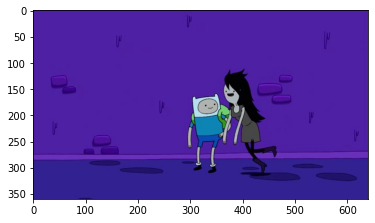

In [2]:
ad_time = '../input/cartoon-classification/cartoon_classification/TRAIN/adventure_time/adventure_time_1033.jpg'
ad_time = cv2.imread(ad_time)
print("Sample Image",", Image shape is: ",ad_time.shape,", type is : ",type(ad_time))
ad_time= cv2.cvtColor(ad_time, cv2.COLOR_BGR2RGB)
plt.imshow(ad_time)

In [3]:
img_width, img_height = 256, 256 #
train_data_dir = r'../input/cartoon-classification/cartoon_classification/TRAIN'
validation_data_dir = r'../input/cartoon-classification/cartoon_classification/TEST/'

batch_size = 8


train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    vertical_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)


train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


Found 119617 images belonging to 10 classes.
Found 18110 images belonging to 10 classes.


In [ ]:
numberOfClass=10
batch_size = 8
epochs=8

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

model = Sequential ()

model.add(Conv2D(32, (3, 3), input_shape=(3, 256, 256), activation = 'relu')) 
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # the CONV CONV POOL structure is popularized in during ImageNet 2014
model.add(Dropout(0.25)) # this thing called dropout is used to prevent overfitting
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(Conv2D(64, (3, 3), activation = 'relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten()) 



model.add(Dropout(0.5))

model.add(Dense(4, activation= 'softmax'))

optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
          optimizer=optimizer,
          metrics=['accuracy'])


hist = model.fit_generator(
        generator=train_generator,
        steps_per_epoch = 1500,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps = 220,
        shuffle=True)

In [ ]:
print(hist.history.keys())

plt.plot(hist.history["loss"], label ="Train Loss")
plt.plot(hist.history["val_loss"], label ="Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"], label ="Train accuracy")
plt.plot(hist.history["val_accuracy"], label ="Validation accuracy")
plt.legend()
plt.show()

In [ ]:
print("[INFO] saving model...")
model.save("model.h5")

In [ ]:
ap = argparse.ArgumentParser()
ap.add_argument("-p", "--path", type=str, default="video.mp4", help="path to video")
args = vars(ap.parse_args()) 

class_dict ={ 0 : "Mickey", 1: "Pooh", 2 : "Donald", 3 : "Minion", 4: "catdog", 5: "pokemon", 6: "smurfs", 7: "southpark", 8: "spongebob", 9: "tom_and_jerry"}
window_name = 'Cartoon Character Recognition'
font = cv.FONT_HERSHEY_DUPLEX
org = (10, 50) 
fontScale = 1
color = (0, 0, 0) 
thickness = 2


model = load_model(args['model'])
cap = cv.VideoCapture(args['path'])

while(cap.isOpened()):
    ret, frame = cap.read()    
    frame = cv.resize(frame, (700, 650), interpolation = cv.INTER_CUBIC)
    img = cv.resize(frame, (256, 256), interpolation = cv.INTER_CUBIC)
    n = img
    n = n.reshape(1, 3, 256, 256).astype('float32')
    cnn_probab = model.predict(n)
    predict = np.argmax(cnn_probab)
    
    frame = cv.putText(frame, class_dict[predict], org, font,  
                       fontScale, color, thickness, cv.LINE_AA)
    print(class_dict[predict])
    
    smallImg=cv.imread(class_dict[predict]+'.jpeg')
    frame[60:60+smallImg.shape[0], 10:10+smallImg.shape[1]] = smallImg

    # Displaying the image 
    cv.imshow(window_name, frame)
    if cv.waitKey(1) & 0xFF == ord('s'):
        start = True
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv.destroyAllWindows()